# **Introduction**

Tourism is a cornerstone of economic growth, generating substantial revenue, creating employment opportunities, and fostering development. It directly contributes to GDP, foreign exchange earnings, and tax revenue. Tourism also stimulates infrastructure development, entrepreneurship, and the growth of small and medium-sized enterprises. As the world continues to globalize, tourism is poised to play an even more prominent role in shaping the economic landscape of the future.

## **Problem Statement**
The objective is to extract valuable insights from the dataset through data analysis techniques. Additionally, the aim is to construct a data-driven model for predicting hotel ratings (scores) based on information related to hotel services and tourist reviews. This initiative is intended to assist both the tourism department and hotels in making informed decisions grounded in data.

## **Data Source and Variables**
The data is extracted from UCI repository and can be accessed from ([here](https://archive.ics.uci.edu/dataset/397/las+vegas+strip))

**Variables**

User country:  Categorical User's nationality

Nr. reviews:   Numerical Number of reviews

Nr. hotel reviews:  Numerical Total hotel reviews
Helpful votes:  Numerical Helpful votes regarding review's info

Score: Numerical Review score {1,2,3,4,5}



Period of stay:  Categorical Period of stay

Traveler type: Categorical type of traveler

Member years : membership years

Pool : Categorical If the hotel has outside pool

Gym:  Categorical If the hotel has gym

Tennis court: Categorical If the hotel has tennis court

Spa: Categorical If the hotel has spa

Casino: Categorical If the hotel has a casino inside

Free internet:  Categorical If the hotel provides free internet

Hotel name:  Categorical Hotel's name

Hotel stars:  Categorical Hotel's number of stars

Nr. rooms:  Numerical Hotel's number of rooms

User continent:  Categorical Continent where the user's country is located


Review month: Computed Review Categorical Month when the review was written (from review date)

Review weekday: Computed Review Categorical Day of the week the review was written (from review date)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("trip_data.csv", sep = ";")
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


## **Cleaning the Data**

In [3]:
# changing the format of column names for convinience
df.columns = [col.lower().replace(' ', '_').replace('.', '') for col in df.columns]
df.columns

Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

In [4]:
df.head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [5]:
#checking for null values
df.isnull().sum()

user_country        0
nr_reviews          0
nr_hotel_reviews    0
helpful_votes       0
score               0
period_of_stay      0
traveler_type       0
pool                0
gym                 0
tennis_court        0
spa                 0
casino              0
free_internet       0
hotel_name          0
hotel_stars         0
nr_rooms            0
user_continent      0
member_years        0
review_month        0
review_weekday      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_country      504 non-null    object
 1   nr_reviews        504 non-null    int64 
 2   nr_hotel_reviews  504 non-null    int64 
 3   helpful_votes     504 non-null    int64 
 4   score             504 non-null    int64 
 5   period_of_stay    504 non-null    object
 6   traveler_type     504 non-null    object
 7   pool              504 non-null    object
 8   gym               504 non-null    object
 9   tennis_court      504 non-null    object
 10  spa               504 non-null    object
 11  casino            504 non-null    object
 12  free_internet     504 non-null    object
 13  hotel_name        504 non-null    object
 14  hotel_stars       504 non-null    object
 15  nr_rooms          504 non-null    int64 
 16  user_continent    504 non-null    object
 17  member_years    

In [8]:

# Since hotel stars should be represented as integer numbers, the column contains typos such as "3,5" and "4,5".
# In this context, I'm interpreting the first number before the comma as the intended hotel star rating.

df['hotel_stars'] = df['hotel_stars'].str.replace(',', '').str.extract(r'(\d)').astype(int)
df['hotel_stars']

0      3
1      3
2      3
3      3
4      3
      ..
499    4
500    4
501    4
502    4
503    4
Name: hotel_stars, Length: 504, dtype: int64

In [9]:
df["hotel_stars"].unique()

array([3, 4, 5])

In [10]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
numeric_columns

,nr_reviews,nr_hotel_reviews,helpful_votes,score,hotel_stars,nr_rooms,member_years
0,11,4,13,5,3,3773,9
1,119,21,75,3,3,3773,3
2,36,9,25,5,3,3773,2
3,14,7,14,4,3,3773,6
4,5,5,2,4,3,3773,7
...,...,...,...,...,...,...,...
499,15,4,8,5,4,826,1
500,50,13,29,4,4,826,8
501,154,23,31,4,4,826,4
502,9,6,5,2,4,826,9


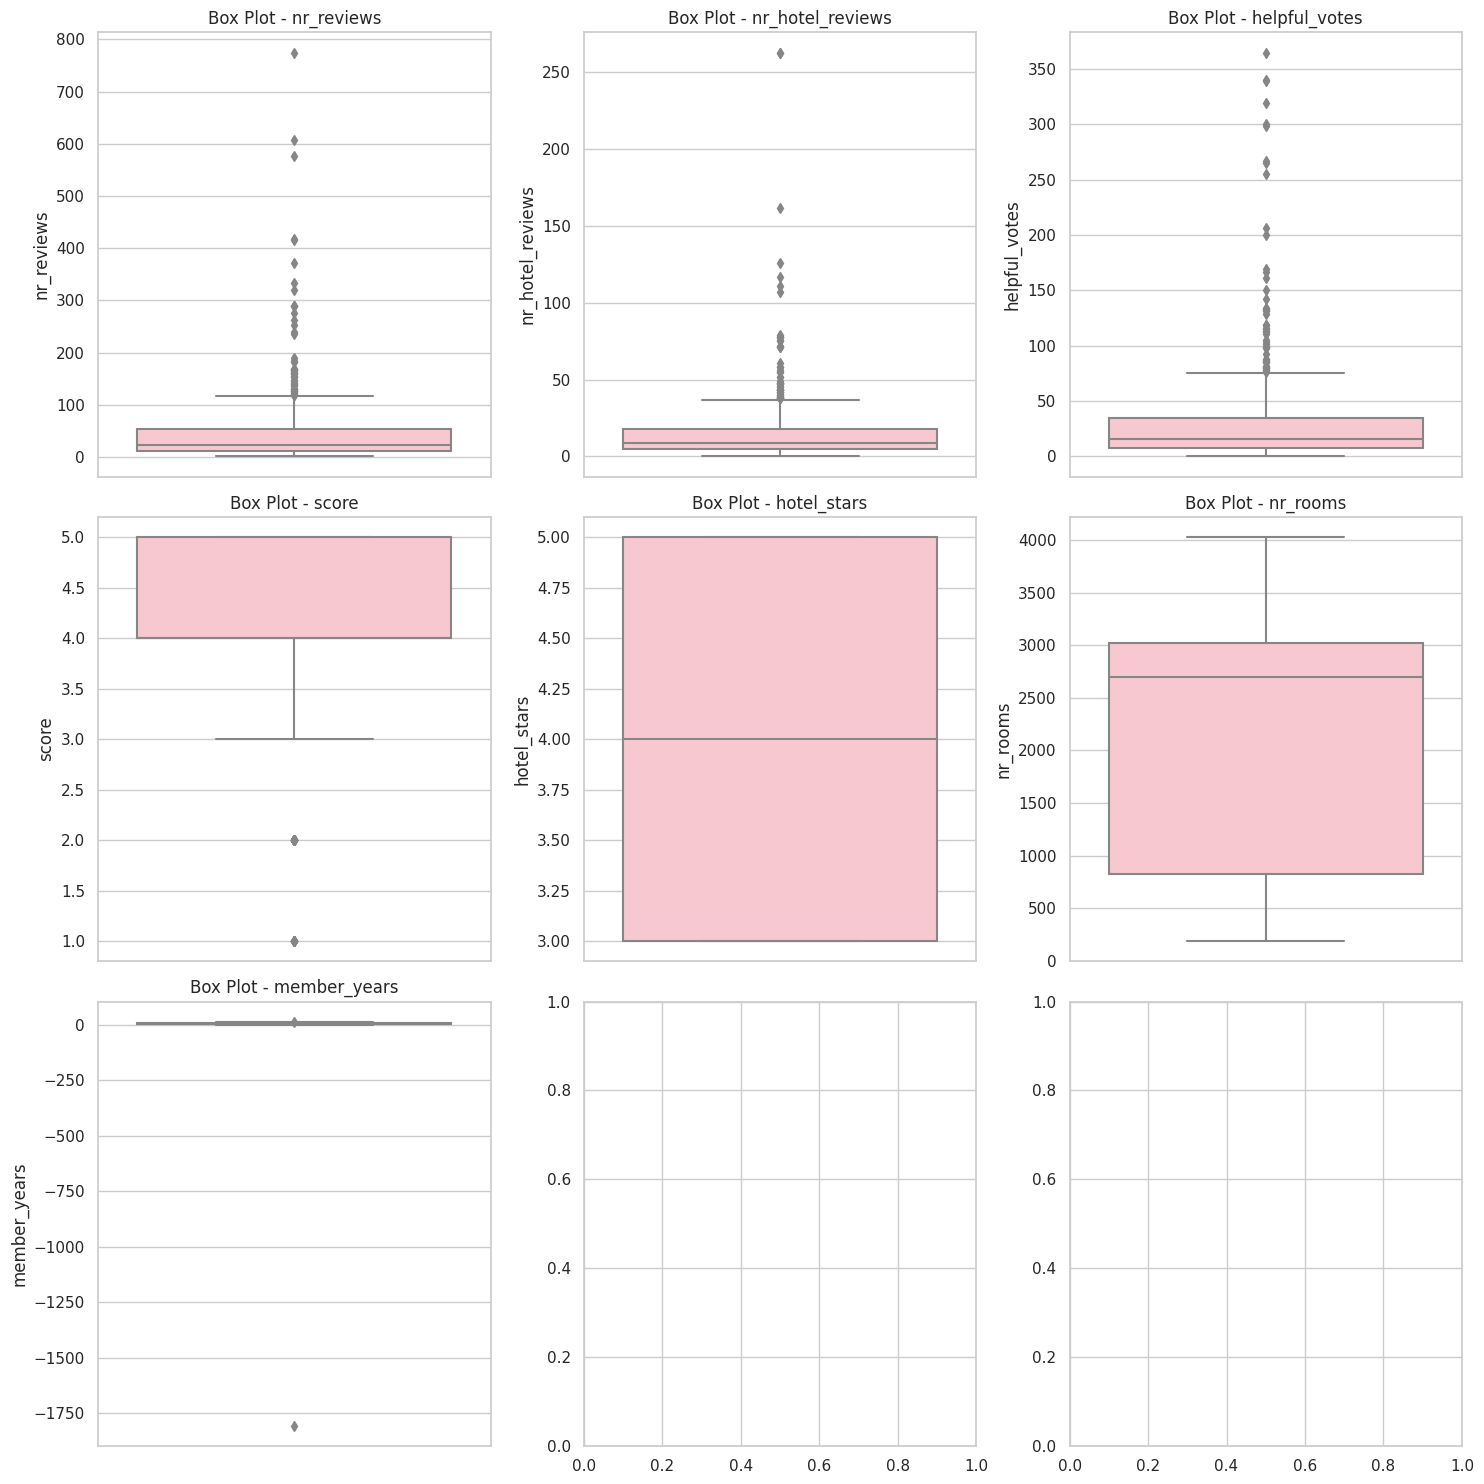

In [11]:
# checking for outliers
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through the variables and create box plots
for i, var in enumerate(numeric_columns.columns):
    sns.boxplot(y=numeric_columns[var], ax=axes[i], color='pink')
    axes[i].set_title(f'Box Plot - {var}')

# Adjust layout

plt.tight_layout()
plt.show()

The counts of reviews in columns like "nr_reviews," "nr_hotel_reviews," and "nr_helpful_reviews" may not necessarily have outliers, as an increase in reviews could be attributed to a promotional campaign that temporarily boosts review activity. However, for the "Score" column, most values fall between 4 and 5, but occasional lower ratings (1 or 2) may indicate dissatisfaction among some customers. On the other hand, the "Membership year" column should not have negative values, suggesting a potential data entry error that needs correction.

In [12]:
df[(df['score'] >= 1) & (df['score'] <= 2)]

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
10,USA,102,24,58,2,Jun-Aug,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,June,Friday
12,USA,7,6,9,2,Jun-Aug,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,1,July,Wednesday
16,Canada,8,8,9,1,Sep-Nov,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,4,September,Wednesday
19,USA,8,7,26,2,Sep-Nov,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,10,October,Monday
21,New Zeland,4,3,3,1,Sep-Nov,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Oceania,3,November,Monday
23,USA,4,4,3,2,Dec-Feb,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,December,Sunday
39,USA,24,6,9,2,Jun-Aug,Families,YES,YES,NO,YES,YES,YES,Excalibur Hotel & Casino,3,3981,North America,2,August,Wednesday
50,USA,418,32,132,2,Dec-Feb,Couples,YES,YES,NO,YES,YES,NO,Monte Carlo Resort&Casino,4,3003,North America,3,February,Tuesday
55,South Africa,54,18,16,2,Mar-May,Business,YES,YES,NO,YES,YES,NO,Monte Carlo Resort&Casino,4,3003,Africa,5,April,Tuesday
62,Swiss,36,19,36,2,Jun-Aug,Solo,YES,YES,NO,YES,YES,NO,Monte Carlo Resort&Casino,4,3003,Europe,5,August,Thursday


having 42 observations with Rating(score) 1 and 2

In [13]:
#checking outlier in membership year column
df[(df['member_years'] < 0)]


,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
75,USA,17,9,16,5,Dec-Feb,Solo,YES,YES,YES,YES,YES,YES,Treasure Island- TI Hotel & Casino,4,2884,North America,-1806,February,Monday


In [14]:
# removing the outlier
df = df[df['member_years'] != -1806]

<Axes: xlabel='member_years', ylabel='Count'>

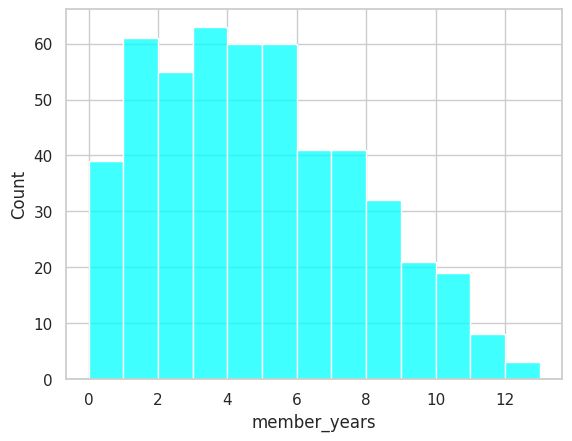

In [15]:
sns.histplot(x = df["member_years"], color = "cyan")

In [16]:
df["member_years"].unique()

array([ 9,  3,  2,  6,  7,  4,  0,  5,  1, 10, 11,  8, 12, 13])

## **Bivariate Analysis**


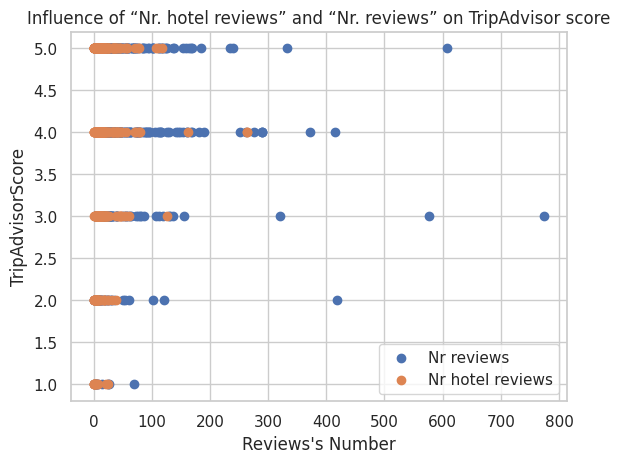

In [17]:
# Relationship between reviews and score

# Scatter plot
plt.scatter(df["nr_reviews"], df["score"], label='Nr reviews')
plt.scatter(df["nr_hotel_reviews"], df["score"], label='Nr hotel reviews')


# Labels and Legend
plt.xlabel("Reviews's Number")
plt.ylabel('TripAdvisorScore')
plt.legend()
plt.title('Influence of “Nr. hotel reviews” and “Nr. reviews” on TripAdvisor score')

# Show the plot
plt.show()

The features 'Nr. hotel reviews' and 'Nr. reviews' are related because the latter includes the former and additional reviews on attractions and restaurants. The plot illustrates how both features impact the 'Score.' As anticipated, after the initial reviews, customers tend to become more discerning when sharing scores online.

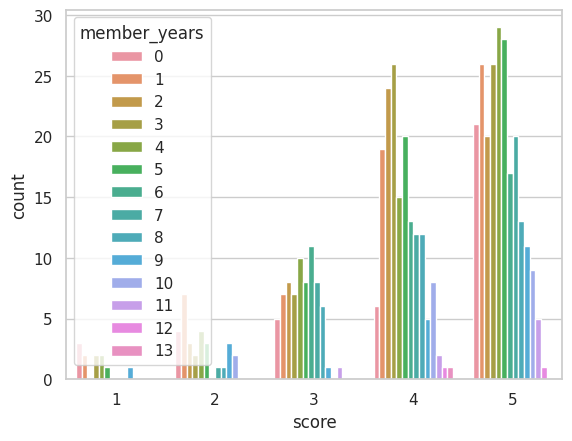

In [18]:
sns.countplot(x='score', hue='member_years', data=df)
plt.show()


Customers who have been members for more than 3 years tend to give higher ratings, specifically ratings greater than 3. It seems that customers with extensive experience in Las Vegas hotels are likely to evaluate services more discerningly. Their habit of sharing detailed reviews might contribute to improved ratings (scores).

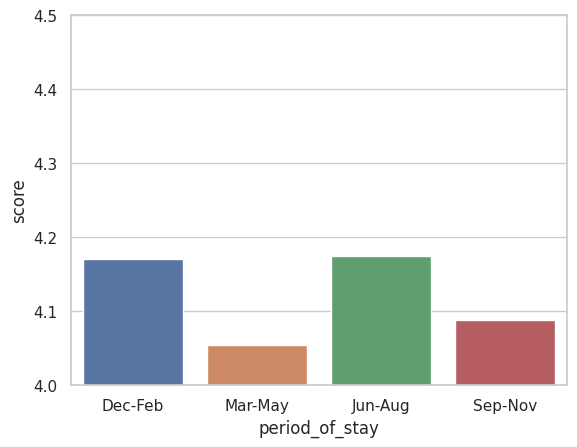

In [19]:
fig = sns.barplot(x='period_of_stay', y='score', data = df, errorbar = None)
fig.set_ylim(4.0, 4.5)
plt.show()

The bar plot above reveals the impact of seasonality on TripAdvisor scores in Las Vegas. The city's tourism experiences a distinct seasonality effect, drawing more visitors during the colder months of autumn and winter as Las Vegas is located in a hot desert. Although the effect is subtle in the plot, the scores peak at 4.18 from December to February, while reaching a low of 4.05 from March to May.

<ipython-input-20-2dfd95a6c410>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rooms['rooms_category'] = pd.cut(df_rooms['nr_rooms'], bins=bins, labels=labels, right=False)


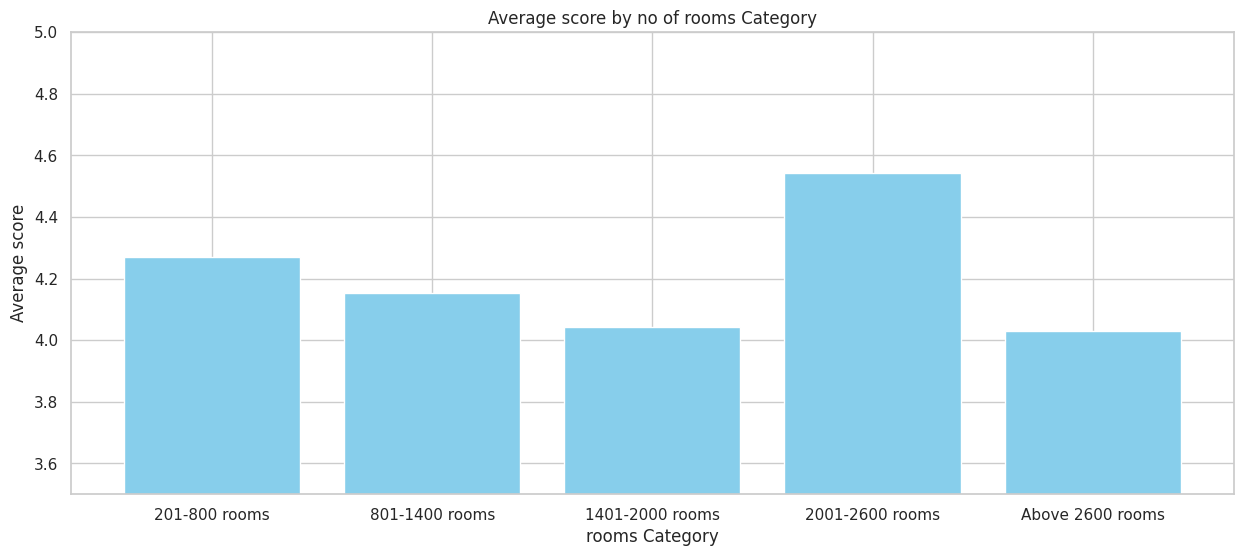

In [20]:
df_rooms = df[["nr_rooms","score"]]
bins = [200,800, 1400, 2000, 2600,  float('inf')]  # age categories in days
labels = [ '201-800 rooms', '801-1400 rooms',"1401-2000 rooms","2001-2600 rooms"  ,'Above 2600 rooms']

# Add a new column 'age_category' to the DataFrame
df_rooms['rooms_category'] = pd.cut(df_rooms['nr_rooms'], bins=bins, labels=labels, right=False)

# Group by 'age_category' and calculate the average concrete strength for each group
grouped_data = df_rooms.groupby('rooms_category')["score"].mean().reset_index()

# Plot the results in a bar plot
plt.figure(figsize=(15, 6))
plt.bar(grouped_data['rooms_category'], grouped_data["score"], color='skyblue')
plt.ylim(3.5,5)
plt.xlabel('rooms Category')
plt.ylabel('Average score')
plt.title('Average score by no of rooms Category')
plt.show()

Hotels with room capacities ranging from 200 to 800 generally boast higher average scores compared to those with larger capacities. Notably, hotels with room counts between 2000 and 2600 deviate from this trend, as they achieve high scores, potentially attributed to additional facilities. The trend suggests that customers tend to prefer hotels with smaller room capacities, appreciating the friendlier and less crowded atmosphere they offer. This quality can be marketed as an advantage, especially for tourists seeking a tranquil stay within the establishment

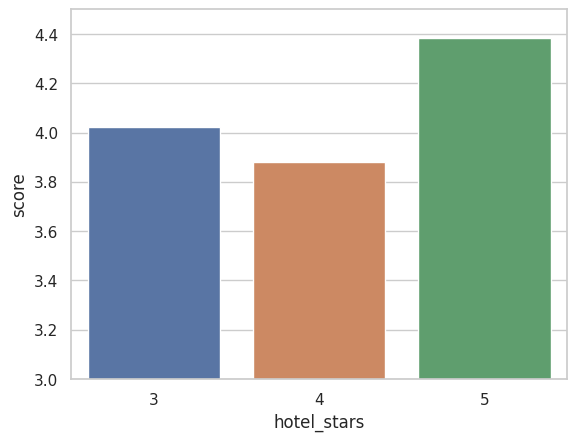

In [21]:
fig = sns.barplot(x='hotel_stars', y='score', data = df, errorbar = None)
fig.set_ylim(3, 4.5)
plt.show()

No of stars of hotel has positive effect on score(ratings), with 5-star hotels receiving the highest average ratings.







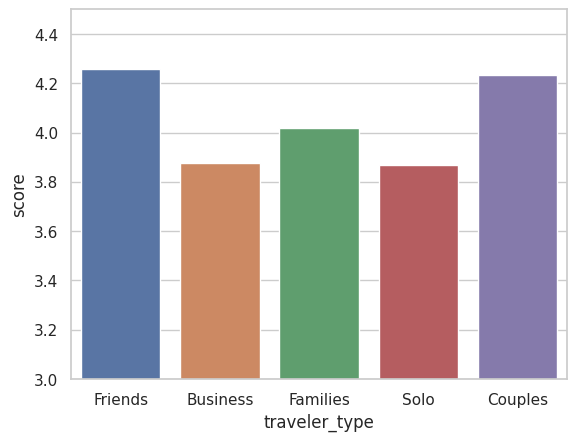

In [22]:
fig = sns.barplot(x='traveler_type', y='score', data = df, errorbar = None)
fig.set_ylim(3, 4.5)
plt.show()

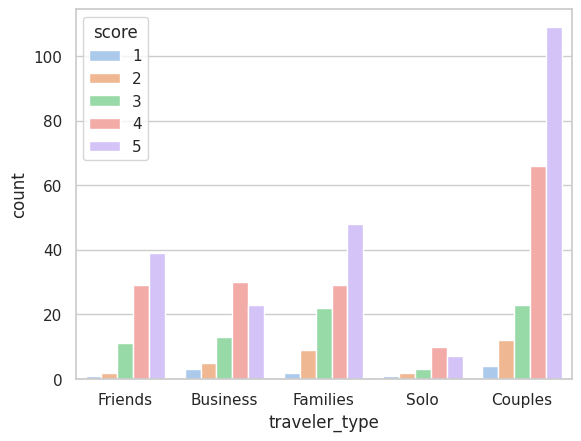

In [23]:
sns.countplot(x='traveler_type',hue = "score", data=df, palette= "pastel")
plt.show()

Couples and Friends give more positive reviews to the hotels evaluating the services more effectively and sharing their reviews with others

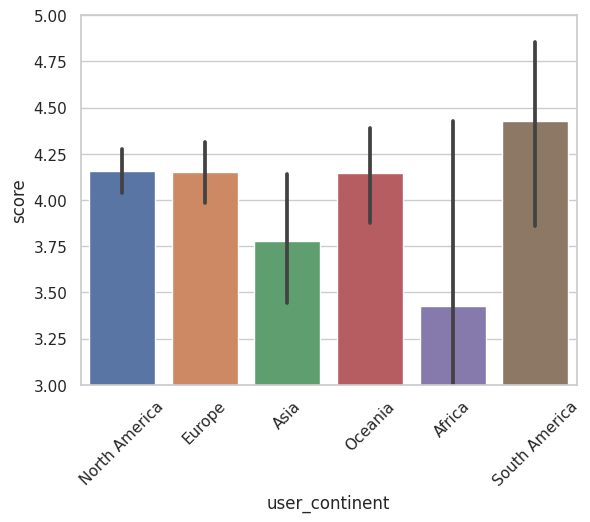

In [24]:
fig = sns.barplot(x = "user_continent", y = "score", data = df)
fig.set_ylim(3, 5)
plt.xticks(rotation=45)
plt.show()

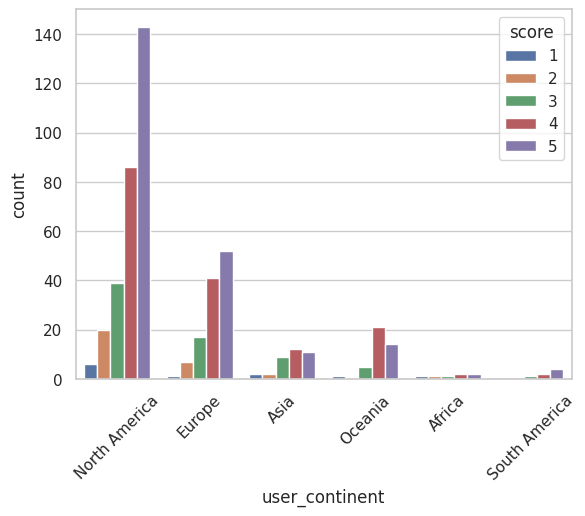

In [25]:
sns.countplot(x='user_continent',hue = "score", data=df)
plt.xticks(rotation=45)
plt.show()

Even with fewer customers from South America, Africa, and Asia, the ratings for hotels and services from these regions are notably high. This impact is evident in the bar plot above. In contrast, the dataset contains a larger number of records or reviews from North America and Europe, where customers mostly provide positive reviews and high ratings.

**Hotel Services impact on score**

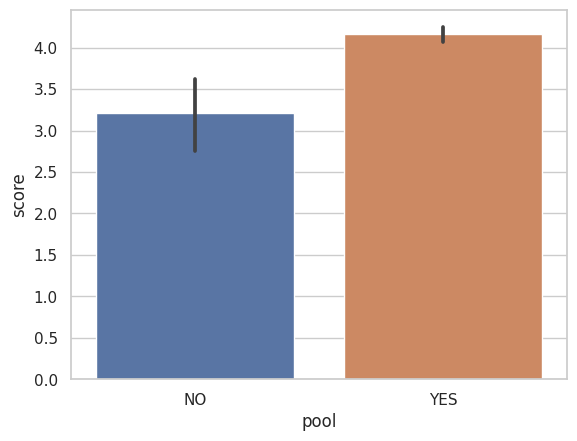

In [26]:
sns.barplot(x = "pool", y = "score", data = df)
plt.show()

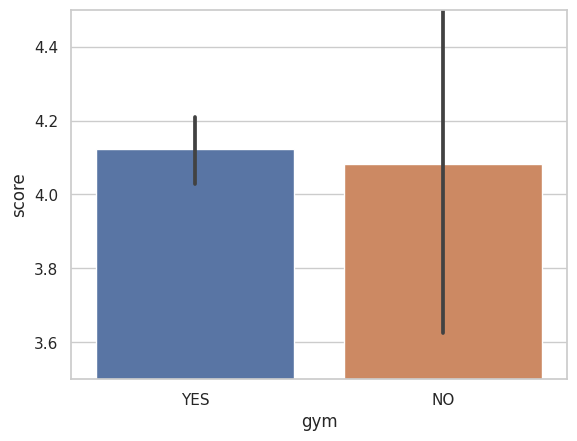

In [27]:
fig = sns.barplot(x = "gym", y = "score", data = df)
fig.set_ylim(3.5,4.5)
plt.show()

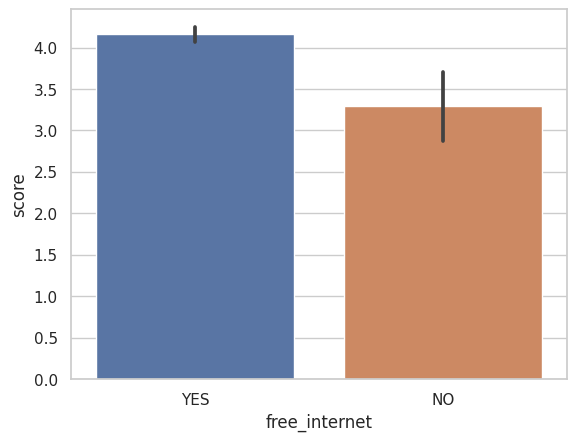

In [28]:
sns.barplot(x = "free_internet", y = "score", data = df)
plt.show()

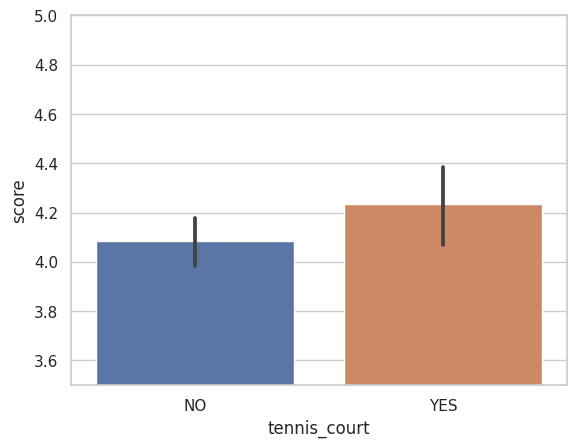

In [29]:
fig = sns.barplot(x = "tennis_court", y = "score", data = df)
fig.set_ylim(3.5, 5)
plt.show()

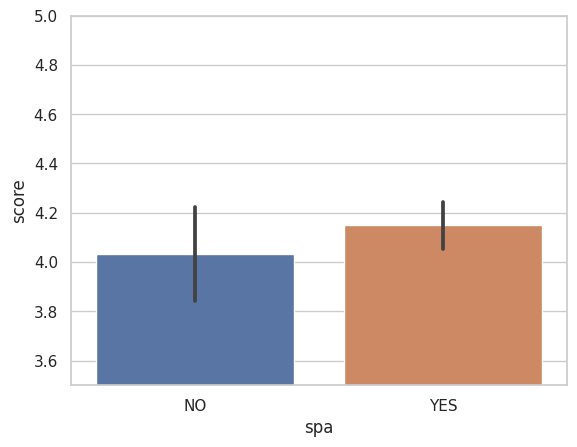

In [30]:
fig  = sns.barplot(x = "spa", y = "score", data = df)
fig.set_ylim(3.5, 5)
plt.show()

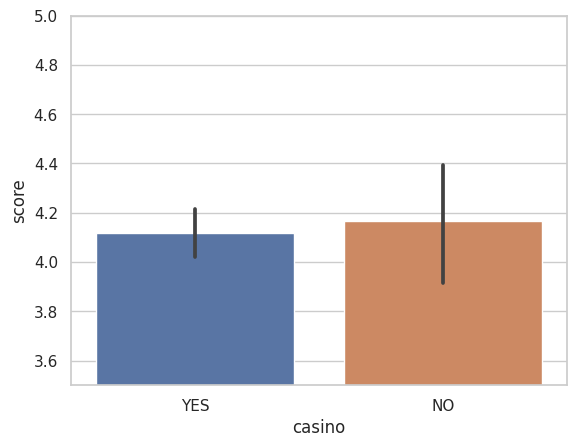

In [31]:
fig = sns.barplot(x = "casino", y = "score", data = df)
fig.set_ylim(3.5,5)
plt.show()

Each of the services plotted above demonstrates a positive impact on the overall score, indicating that offering these amenities tends to result in higher ratings. Notably, having a pool and free internet has a more pronounced effect, leading to a significant increase in the score. On the other hand, services like the gym, spa, and tennis court individually may not have as strong an influence on ratings. However, when offered collectively, these amenities contribute to an improved rating for hotels.

## **Modelling**

### **Data Preprocessing**

In [32]:
from sklearn.preprocessing import LabelEncoder

# List of categorical variables to be encoded
categorical_vars = [ 'period_of_stay',	'traveler_type',	'pool',	'gym',	'tennis_court',	'spa'	,'casino',	'free_internet', "user_continent"]

# Create a dictionary to store the encoders
df_enc = df.copy()

# Loop through each categorical variable and encode it
for var in categorical_vars:
    encoder = LabelEncoder()
    encoded_var = encoder.fit_transform(df[var])
    df_enc[var] = encoded_var


df_enc.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,0,3,0,1,0,0,1,1,Circus Circus Hotel & Casino Las Vegas,3,3773,3,9,January,Thursday
1,USA,119,21,75,3,0,0,0,1,0,0,1,1,Circus Circus Hotel & Casino Las Vegas,3,3773,3,3,January,Friday
2,USA,36,9,25,5,2,2,0,1,0,0,1,1,Circus Circus Hotel & Casino Las Vegas,3,3773,3,2,February,Saturday
3,UK,14,7,14,4,2,3,0,1,0,0,1,1,Circus Circus Hotel & Casino Las Vegas,3,3773,2,6,February,Friday
4,Canada,5,5,2,4,2,4,0,1,0,0,1,1,Circus Circus Hotel & Casino Las Vegas,3,3773,3,7,March,Tuesday


<ipython-input-33-a62d5f778a41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_enc.corr(),annot=True)


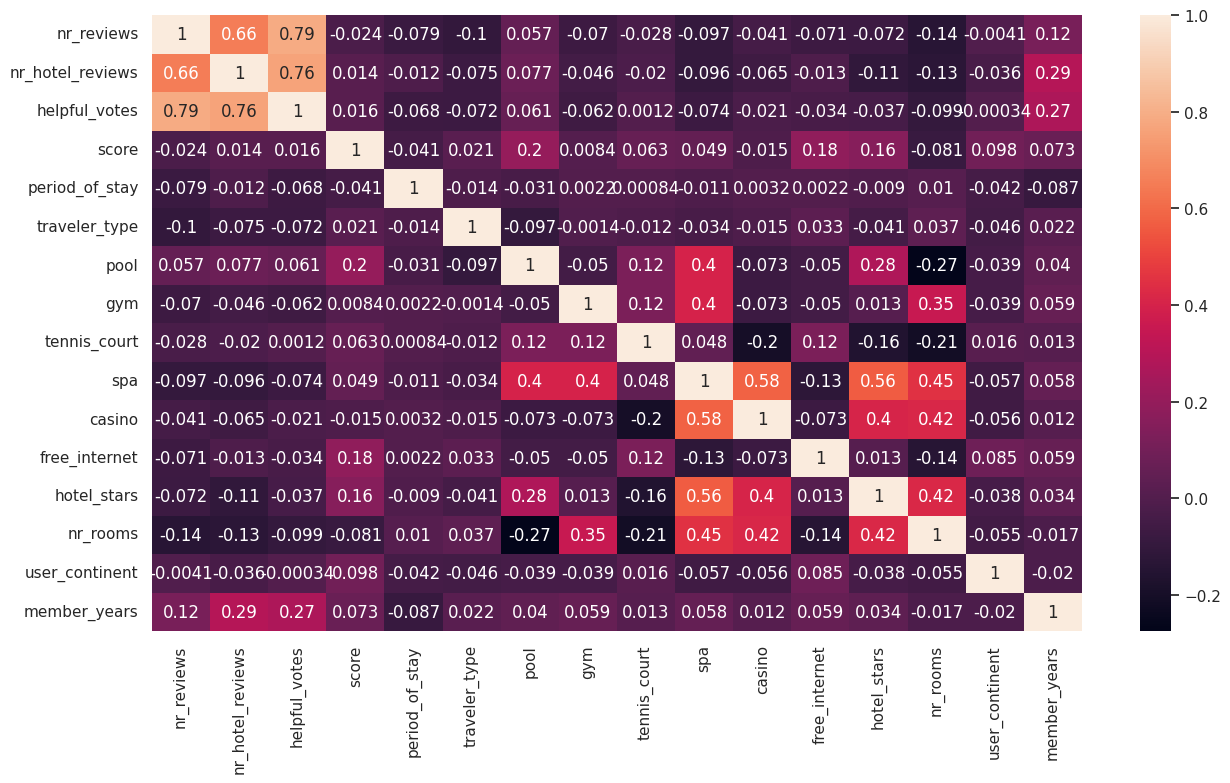

In [33]:

plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

The heatmap analysis reveals the absence of a linear relationship between the predictors  and the target variable (score/rating). This suggests the potential existence of a nonlinear relationship between the predictors and the target variable. Interestingly, features associated with reviews, such as the number of reviews, hotel reviews, and helpful reviews, exhibit strong correlations among themselves, each exceeding 0.5. Similarly, features related to hotel facilities also display notable correlations among themselves.

In [34]:
#dropping the columns that seems irrelevent
df_enc.drop(["user_country","hotel_name","review_month","review_weekday"], axis = 1,inplace = True)
df_enc

,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms,user_continent,member_years
0,11,4,13,5,0,3,0,1,0,0,1,1,3,3773,3,9
1,119,21,75,3,0,0,0,1,0,0,1,1,3,3773,3,3
2,36,9,25,5,2,2,0,1,0,0,1,1,3,3773,3,2
3,14,7,14,4,2,3,0,1,0,0,1,1,3,3773,2,6
4,5,5,2,4,2,4,0,1,0,0,1,1,3,3773,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,15,4,8,5,3,1,1,1,0,1,1,1,4,826,2,1
500,50,13,29,4,3,1,1,1,0,1,1,1,4,826,3,8
501,154,23,31,4,3,3,1,1,0,1,1,1,4,826,3,4
502,9,6,5,2,0,2,1,1,0,1,1,1,4,826,3,9


In [35]:
df_enc["score"].value_counts()

5    226
4    164
3     72
2     30
1     11
Name: score, dtype: int64

### **Checking the distribution of ratings among the hotels**

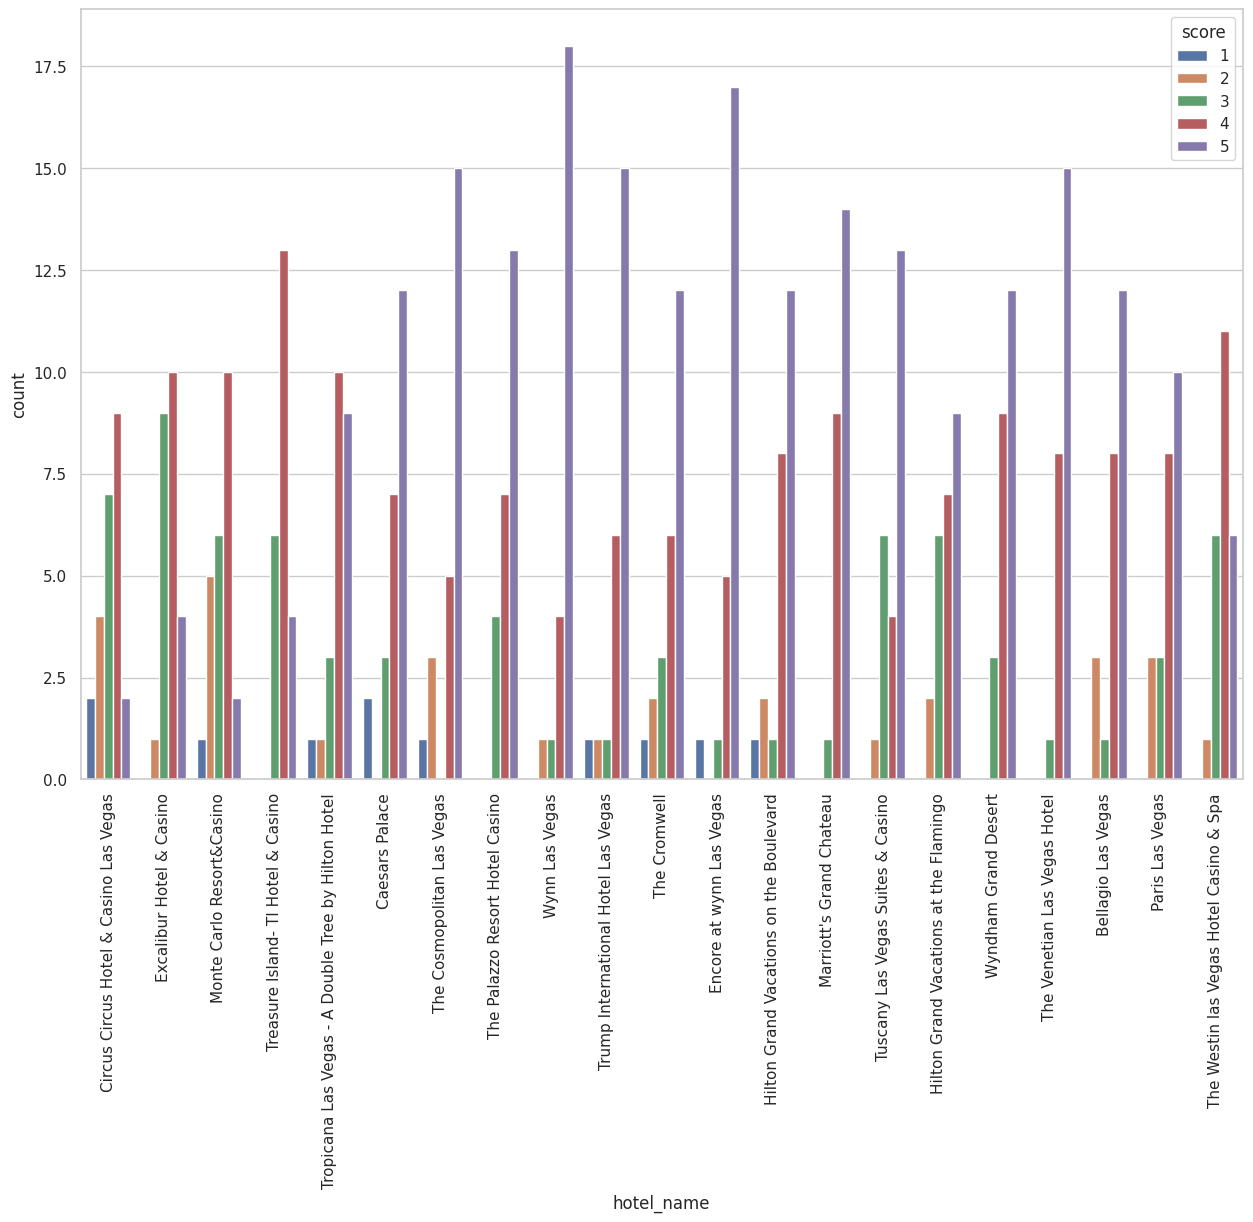

In [63]:
plt.figure(figsize=(15, 10))
sns.countplot(x=df["hotel_name"], hue = df["score"], data = df)
plt.xticks(rotation = 90)
plt.show()

## **Checking the class distribution**

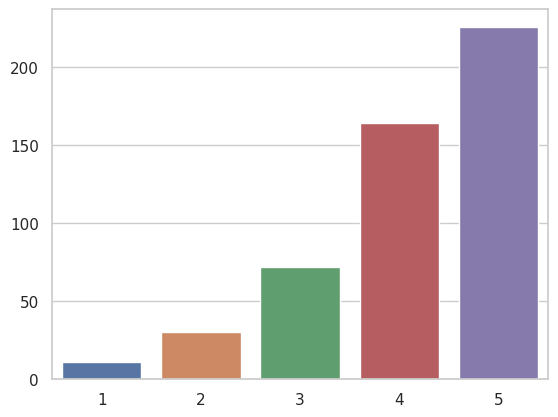

In [46]:
idx, c = np.unique(y,return_counts = True)
sns.barplot(x = idx, y = c)
plt.show()

The dataset has imbalance class problem

## **Fitting SVM and Random Forest without treating the imbalance data problem**

In [40]:
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df_enc.drop("score", axis = 1)
y = df_enc["score"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [41]:
#scaling the data
scalar = MinMaxScaler()

X_train_sc = scalar.fit_transform(x_train)
X_test_sc = scalar.transform(x_test)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a SVM classifier
clf = SVC(kernel='rbf', C=10)

# Fit the classifier to the training data
clf.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_sc)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.46
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.14      0.08      0.10        13
           4       0.42      0.27      0.33        37
           5       0.51      0.81      0.62        43

    accuracy                           0.46       101
   macro avg       0.21      0.23      0.21       101
weighted avg       0.39      0.46      0.40       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM does not performs good on data as it totally missclassify the minority classes having F1 score 0 for class 1 and 2 potentially due to imbalance dataset

In [43]:
# Create a SVM classifier
clf = SVC(kernel='rbf',  class_weight= "balanced")

# Fit the classifier to the training data
clf.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_sc)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.24
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.18      0.33      0.24         6
           3       0.13      0.23      0.17        13
           4       0.28      0.14      0.18        37
           5       0.48      0.33      0.39        43

    accuracy                           0.24       101
   macro avg       0.21      0.20      0.19       101
weighted avg       0.33      0.24      0.27       101



In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100, min_samples_split = 5, random_state= 32, class_weight="balanced")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.30      0.23      0.26        13
           4       0.36      0.24      0.29        37
           5       0.48      0.70      0.57        43

    accuracy                           0.42       101
   macro avg       0.23      0.23      0.22       101
weighted avg       0.38      0.42      0.38       101

Confusion Matrix:
[[ 0  0  0  0  2]
 [ 0  0  1  1  4]
 [ 0  0  3  5  5]
 [ 0  1  6  9 21]
 [ 0  3  0 10 30]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest exhibits suboptimal performance, particularly in misclassifying minority classes, notably class 1 and 2. The model's overall performance is further compromised across other classes due to the challenges posed by imbalanced class distribution.

## **Addressing Class Imbalance through the Implementation of SMOTE Technique**

In [45]:
!pip install imbalanced-learn

In [47]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X,y)

In [48]:
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 10)  # again splitting the data

### **Hyperparameter tuning**

In [64]:
from sklearn.model_selection import  GridSearchCV
estimator_rf  = RandomForestClassifier(random_state = 0)
param_grid_rf = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7) }

gscv_rf = GridSearchCV(estimator=estimator_rf,param_grid=param_grid_rf)
gscv_rf.fit(x_train_res,y_train_res)
print("RF: Best : %f using: %s" % (gscv_rf.best_score_,gscv_rf.best_params_))

RF: Best : 0.619478 using: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 100}


In [50]:
model_res = RandomForestClassifier(n_estimators =100, min_samples_split = 5, random_state= 32, max_depth = 6)
model_res.fit(x_train_res,y_train_res)
y_pred_res = model.predict(x_test_res)
# Evaluate the performance
accuracy = accuracy_score(y_test_res, y_pred_res)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test_res, y_pred_res))
conf_matrix = confusion_matrix(y_test_res, y_pred_res)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.41      0.58        39
           2       0.85      0.37      0.52        46
           3       0.66      0.75      0.70        44
           4       0.70      0.74      0.72        54
           5       0.47      0.91      0.62        43

    accuracy                           0.64       226
   macro avg       0.74      0.64      0.63       226
weighted avg       0.73      0.64      0.63       226

Confusion Matrix:
[[16  0  8  6  9]
 [ 0 17  6  4 19]
 [ 0  0 33  6  5]
 [ 0  0  3 40 11]
 [ 0  3  0  1 39]]


## **Conclusion**

The model's performance shows a notable improvement, with the accuracy increasing from 0.42 to 0.64. The F1 scores, particularly for classes 1 and 2, exhibit significant enhancement, addressing the previous challenges of misclassification. The potential for further model improvement is evident, and it could be more pronounced with an increased volume of data. The existing dataset, derived from the TripAdvisor website, comprises 504 observations, suggesting that a more robust model could be developed with a larger dataset. Additionally, incorporating more relevant features, such as cleanliness, view, and entertainment, has the potential to contribute to the model's efficacy.

## **Recommendations**

* Hotels can create a more cozy and friendly vibe by not having too many rooms. People often like places that aren't too crowded.

* Since most reviews come from couples and friends, hotels could make their entertainment options more appealing to these groups. This would help in keeping these customers happy and coming back.

* It's a good idea for hotels to focus on providing facilities for business events. This could attract more business people who need places for meetings and seminars.

* Since a lot of customers come from North America, hotels in Las Vegas might want to consider promotions to attract visitors from other parts of the world too.

* To make guests happier, hotels could add more amenities. For example, adding sports facilities or entertainment options like movie halls, theaters, and art galleries can make a stay more enjoyable.